#### Importing all important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv('Final Project 1.csv')

In [24]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [25]:
df.shape

(1599, 13)

#### checking if contains null values

In [26]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
best_quality            0
dtype: int64

In [27]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best_quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [56]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
best_quality              int64
dtype: object

#### ploting correlation map to see correlation between attributes

<AxesSubplot:>

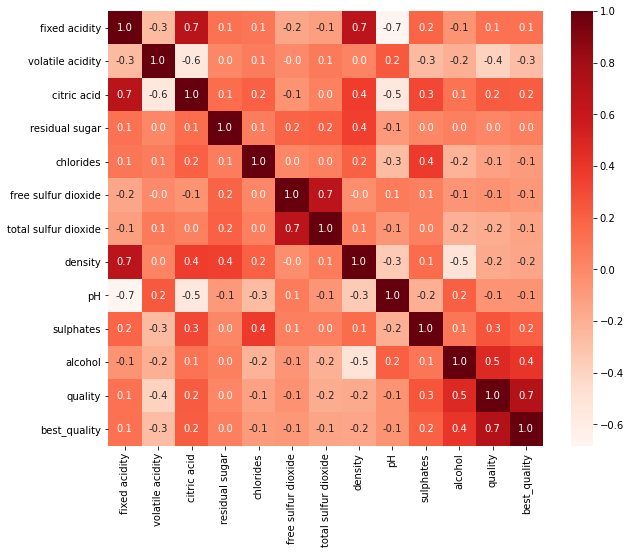

In [28]:
correl = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(correl, cbar = True, square=True, fmt='.1f', annot= True, cmap='Reds')

In [29]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

#### Visualization

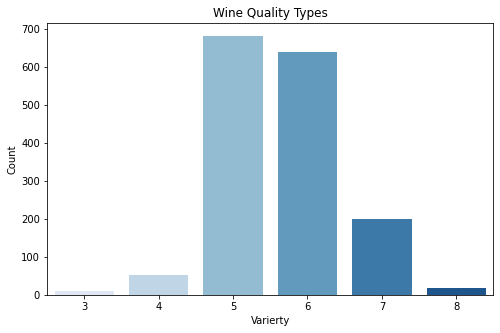

In [30]:
plt.figure(figsize = (8,5))
sns.barplot(x = df['quality'].value_counts().keys(), y = df['quality'].value_counts().values, data = df, palette = 'Blues')
plt.title("Wine Quality Types")
plt.xlabel("Varierty")
plt.ylabel("Count")
plt.show()

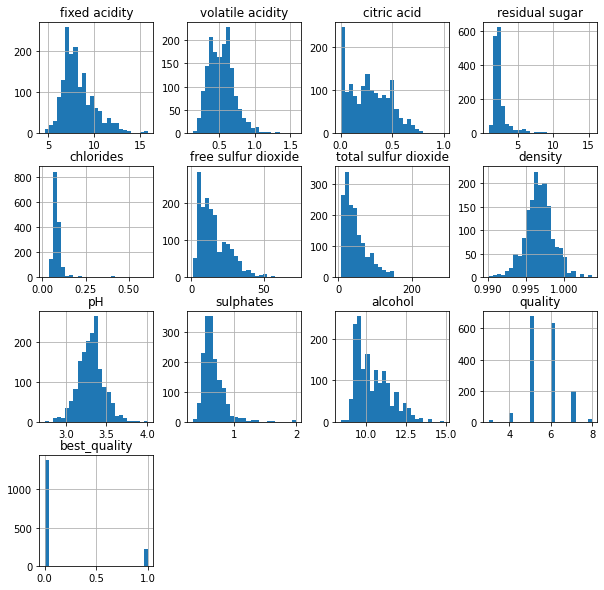

In [31]:
df.hist(bins = 25,figsize = (10,10))
plt.show()

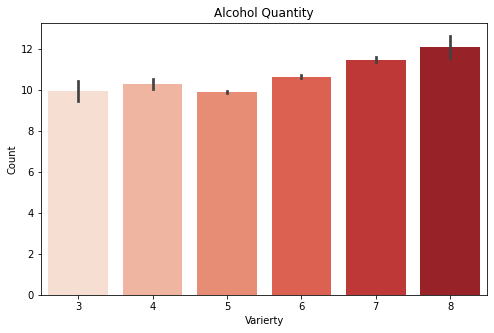

In [32]:
plt.figure(figsize = (8,5))
sns.barplot(x = df['quality'], y = df['alcohol'], data = df, palette = 'Reds')
plt.title("Alcohol Quantity")
plt.xlabel("Varierty")
plt.ylabel("Count")
plt.show()

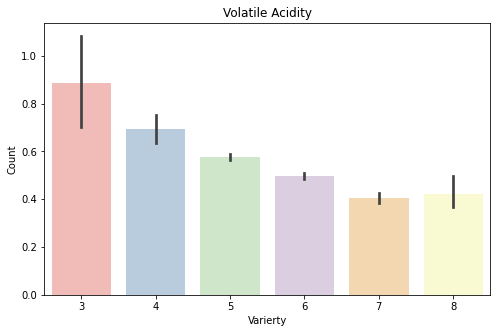

In [33]:
plt.figure(figsize = (8,5))
sns.barplot(x = df['quality'], y = df['volatile acidity'], data = df, palette = 'Pastel1')
plt.title("Volatile Acidity")
plt.xlabel("Varierty")
plt.ylabel("Count")
plt.show()

#### if quality is 7 or more then best quality wine else not

In [4]:
df['best_quality'] = [1 if x >= 7 else 0 for x in df['quality']]

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [6]:
X = df.drop(columns = ['quality','best_quality'], axis = 1)
Y = df['best_quality']

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


#### Normalizing the data

In [8]:
norm = MinMaxScaler()
norm_fit = norm.fit(X_train)
new_xtrain = norm_fit.transform(X_train)
new_xtest = norm_fit.transform(X_test)

#### Using Random Forest Classifier

In [19]:
rfc = RandomForestClassifier(n_jobs=2, n_estimators=100, criterion='entropy')
fit_rfc = rfc.fit(new_xtrain,Y_train)
y_pred = rfc.predict(new_xtest)

In [20]:
print(accuracy_score(Y_test,y_pred))

0.946875


In [21]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       290
           1       0.76      0.63      0.69        30

    accuracy                           0.95       320
   macro avg       0.86      0.81      0.83       320
weighted avg       0.94      0.95      0.94       320



In [22]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test, y_pred)

[[284   6]
 [ 11  19]]


0.946875

In [23]:
importance = rfc.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.07074
Feature: 1, Score: 0.11921
Feature: 2, Score: 0.09745
Feature: 3, Score: 0.06228
Feature: 4, Score: 0.07283
Feature: 5, Score: 0.05724
Feature: 6, Score: 0.07795
Feature: 7, Score: 0.08799
Feature: 8, Score: 0.05651
Feature: 9, Score: 0.12023
Feature: 10, Score: 0.17758


In [36]:
print(rfc.predict(norm.transform([[7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4]])))

[0]


In [42]:
print(rfc.predict(norm.transform([[7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5]])))

[1]
